## 1. Install Dependencies

In [2]:
import tensorflow as tf
import os

## 2. Pre process data

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Image not in ext list data\happy\7-Habits-of-Happy-People.webp
Image not in ext list data\happy\depositphotos_208447156-stock-photo-young-happy-people-have-fun.jpg
Image not in ext list data\happy\depositphotos_317939792-stock-photo-young-woman-isolated-yellow-background.jpg
Image not in ext list data\happy\depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not in ext list data\happy\depositphotos_8807359-stock-photo-mixed-race-man-smiling.jpg
Image not in ext list data\happy\download-happy-blackman-_23624.html
Image not in ext list data\happy\group-happy-people-isolated-over-600w-102307264.jpg
Image not in ext list data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data\happy\mspin_googcolor_medium.svg
Image not in ext list data\happy\portrait-smiling-young-friends-walking-260nw-1392193913.jpg
Image not in ext list data\happy\portrait-young-father-carrying-his-260nw-736997836.jpg
Image not in ext list data\sad\depositphotos_1

## 3. Load Data

In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 657 files belonging to 2 classes.


In [12]:
data.class_names

['happy', 'sad']

In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

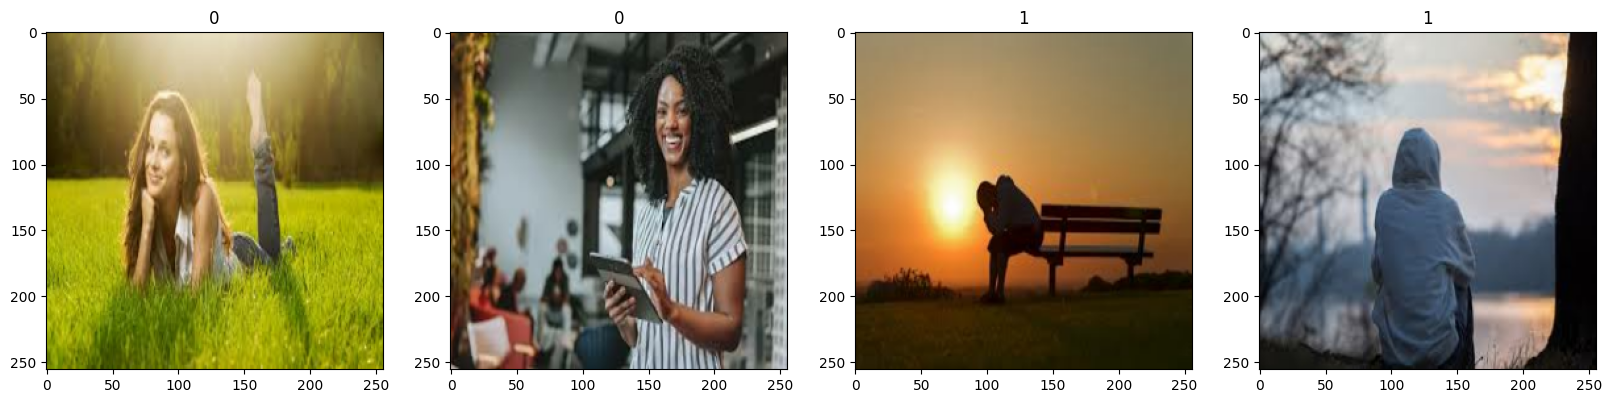

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
len(data)

21

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [21]:
train_size+val_size+test_size

21

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 4. Build Deep learning model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\kdkas\Desktop\projects\cnn simple emotion\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Train the model

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 672ms/step - accuracy: 0.4650 - loss: 1.4331 - val_accuracy: 0.5156 - val_loss: 0.7031
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 657ms/step - accuracy: 0.5034 - loss: 0.6865 - val_accuracy: 0.7109 - val_loss: 0.6463
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 649ms/step - accuracy: 0.6961 - loss: 0.6221 - val_accuracy: 0.7812 - val_loss: 0.5548
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 739ms/step - accuracy: 0.7901 - loss: 0.5526 - val_accuracy: 0.7109 - val_loss: 0.5727
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 787ms/step - accuracy: 0.7359 - loss: 0.5518 - val_accuracy: 0.7266 - val_loss: 0.4810
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 624ms/step - accuracy: 0.8248 - loss: 0.4333 - val_accuracy: 0.7500 - val_loss: 0.5145
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 635ms/step - accuracy: 0.8445 - loss: 0.4677 - val_accuracy: 0.7188 - val_loss: 0.5659
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 584ms/step - accuracy: 0.8171 - loss: 0.3977 - val_accuracy

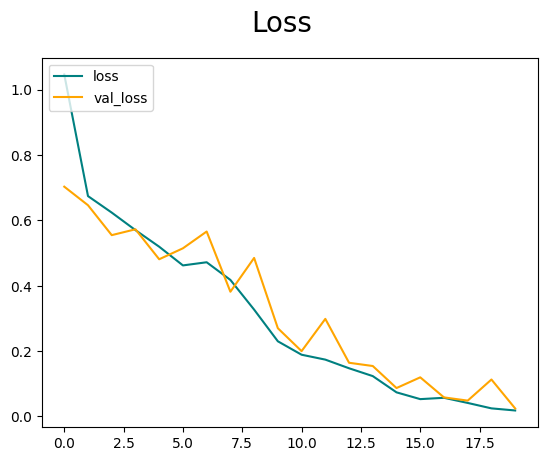

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

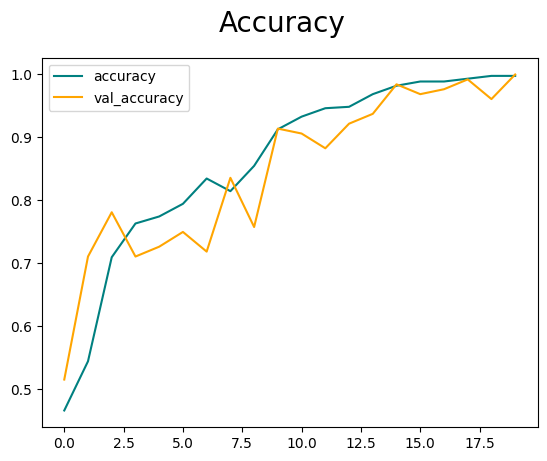

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 6. Evaluate model

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


In [39]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9729729890823364, Recall: 1.0, Accuracy: 0.9876543283462524


## 7. Save the model

In [1]:
from tensorflow.keras.models import load_model

In [42]:
model.save(os.path.join('models','imageclassifier.keras'))

In [7]:
new_model = load_model('../models/imageclassifier.keras')

c:\Users\kdkas\Desktop\projects\cnn simple emotion\venv\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [8]:
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,252 (28.20 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,696,627 (14.10 MB)